## Rod Pump Failure Analysis: EDA Assignment

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load data, parse datetime columns, and replace `lifetime_start` and `lifetime_end` with `lifetime`.

In [2]:
raw_data = pd.read_csv('../rodpump_cleaned.csv', parse_dates=['lifetime_end'])

Create pairplot with all quantitative columns, and separate datapoints by failure type.

In [3]:
# pairplot = sns.pairplot(raw_data[['H2S_CONCENTRATION','PrimarySetpoint','SecondarySetpoint','StrokeLength','Fillage','YesterdaysAverageSPM','max_unguided_dls','dls_high_in_hole','gas_anchor_length','MAX_INCLINATION','AVG_PRESSURE_TUBING','AVG_PRESSURE_CASING', 'AVG_DIFFERENTIAL_PRESSURE','AVG_OIL_VOLUME','AVG_WATER_VOLUME','AVG_LIQUID_VOLUME','overall_max_sideload','shallow_max_sideload','max_unguided_sideload','lifetimedays','FAILURETYPE']], hue='FAILURETYPE', corner=True, diag_kind="kde")
# pairplot.savefig("../Images/pairplot.png")

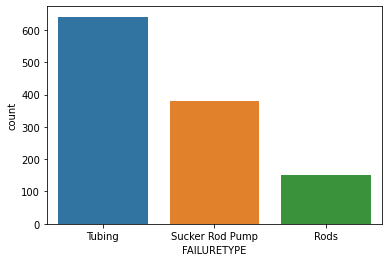

In [4]:
failuretype_countplot = sns.countplot(data=raw_data, x='FAILURETYPE')
fig = failuretype_countplot.get_figure()
fig.savefig("../Images/failuretype_countplot.png")

In [5]:
def pairplots(df, columns, bycolumn, filename):
    raw_pairplot = sns.pairplot(df[columns], diag_kind="kde", corner=True)
    raw_pairplot.savefig("../Images/" + filename + ".png")
    
    concat_columns = columns + [bycolumn]
    raw_pairplot = sns.pairplot(df[concat_columns], hue=bycolumn, diag_kind="kde", corner=True)
    raw_pairplot.savefig("../Images/" + filename + "_by" + bycolumn + ".png")

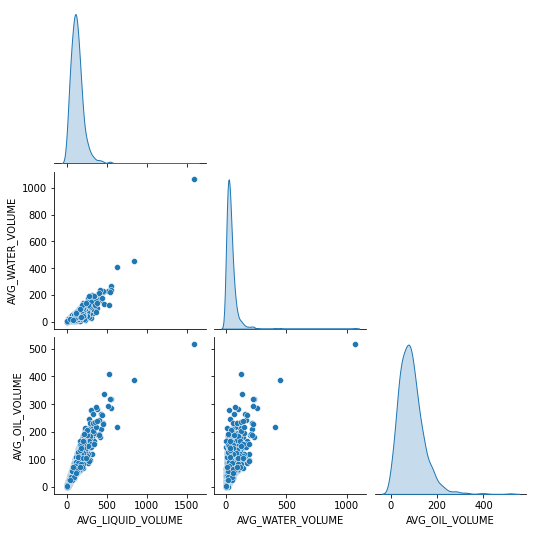

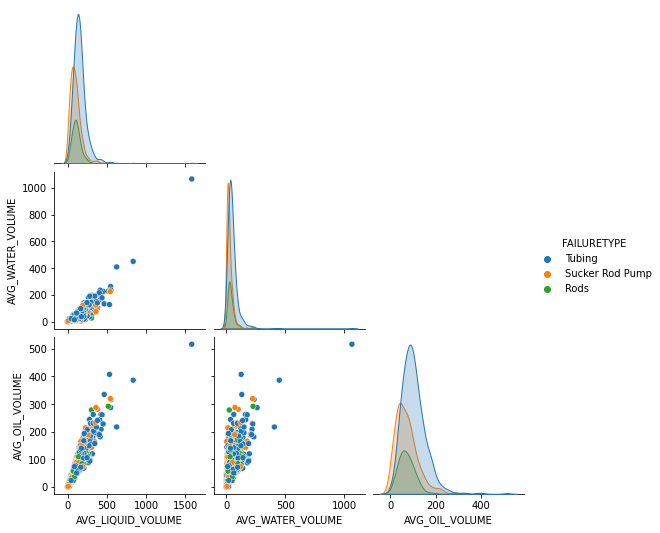

In [6]:
pairplots(raw_data, ['AVG_LIQUID_VOLUME','AVG_WATER_VOLUME','AVG_OIL_VOLUME'], 'FAILURETYPE', 'volume_pairplot')

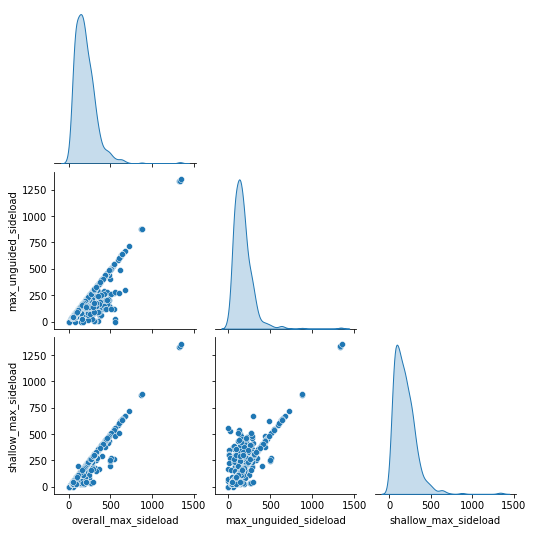

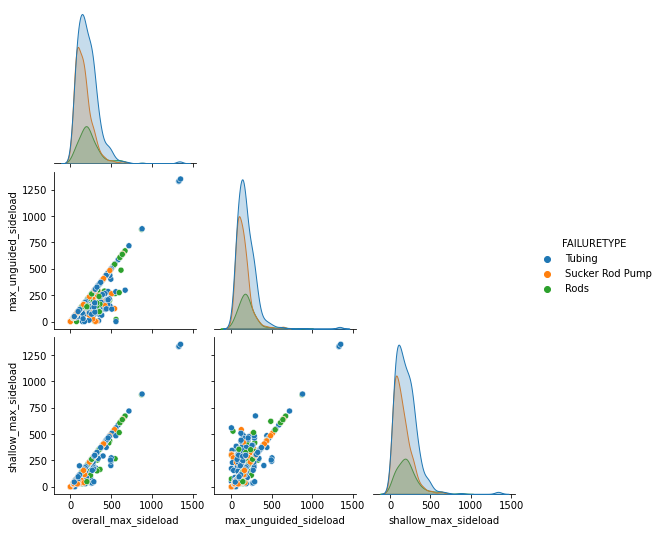

In [7]:
pairplots(raw_data, ['overall_max_sideload','max_unguided_sideload','shallow_max_sideload'],'FAILURETYPE','sideload_pairplot')

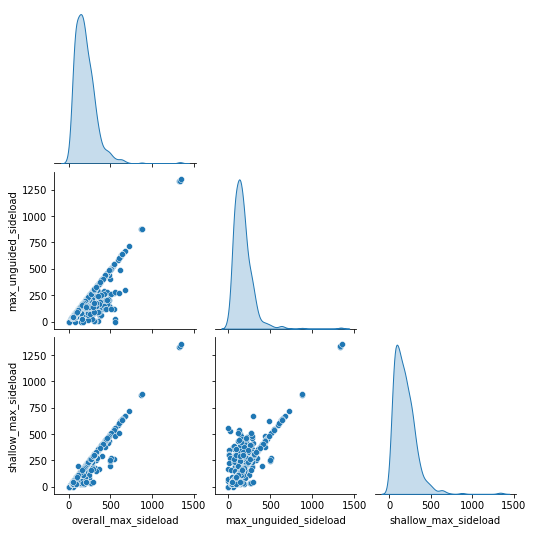

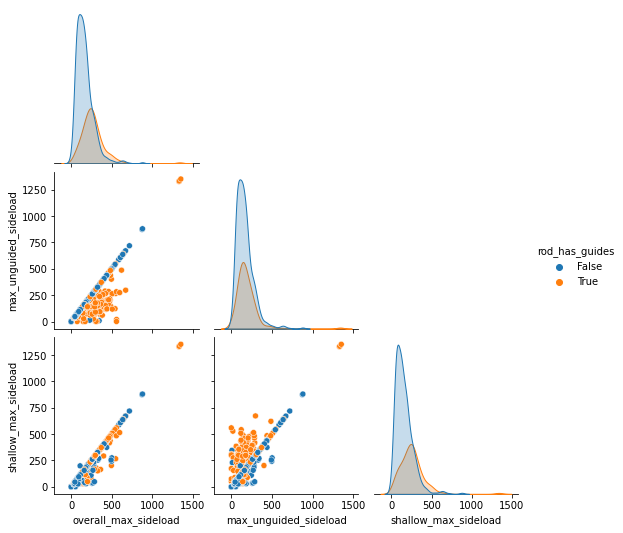

In [8]:
pairplots(raw_data, ['overall_max_sideload','max_unguided_sideload','shallow_max_sideload'],'rod_has_guides','sideload_pairplot')

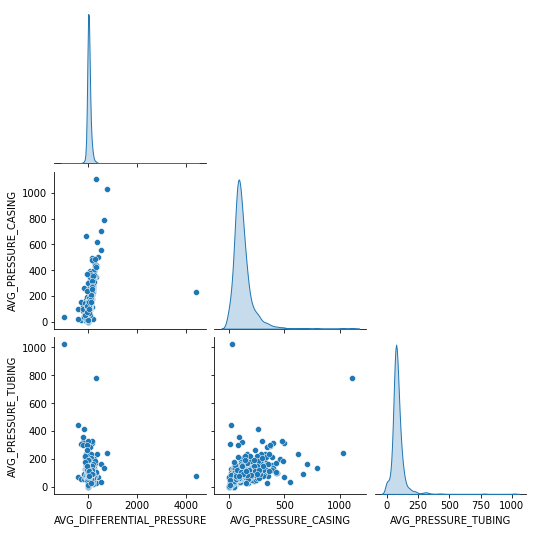

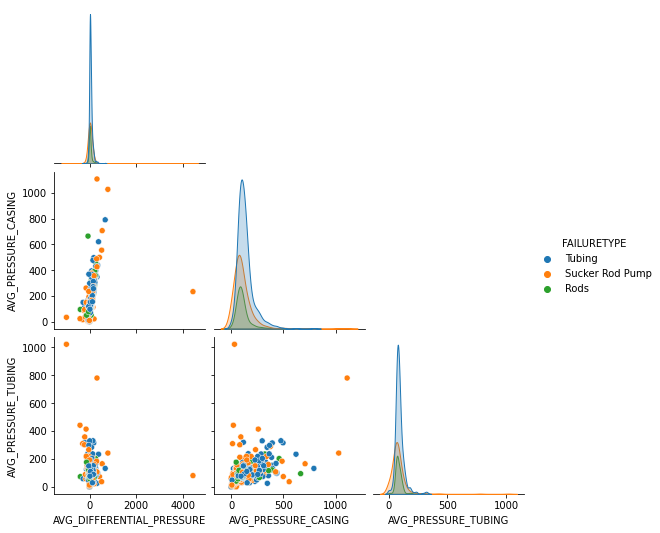

In [9]:
pairplots(raw_data, ['AVG_DIFFERENTIAL_PRESSURE','AVG_PRESSURE_CASING','AVG_PRESSURE_TUBING'], 'FAILURETYPE', 'pressure_pairplot')

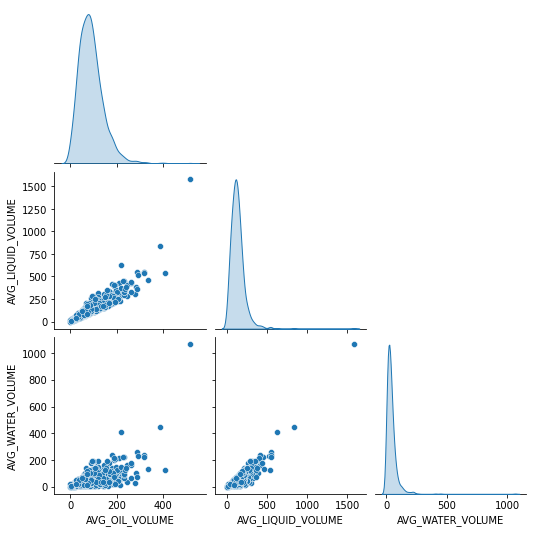

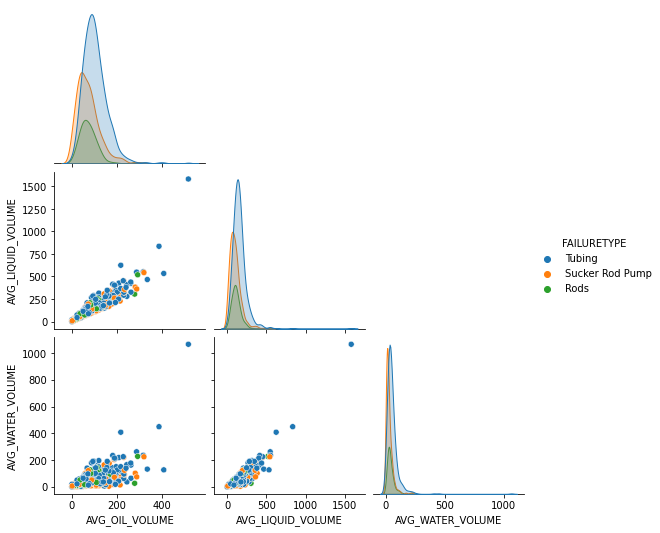

In [10]:
pairplots(raw_data, ['AVG_OIL_VOLUME','AVG_LIQUID_VOLUME','AVG_WATER_VOLUME'], 'FAILURETYPE', 'pressure_pairplot')

### KDE Plots

In [11]:
sns.set(rc={'figure.figsize':(12,8)})
def kde(df, variable, by):
    sns.kdeplot(data=df, x=variable)
    plt.savefig('../Images/' + variable + '.png')
    plt.show()
    plt.clf()
    
    sns.kdeplot(data=df, x=variable, hue=by)
    plt.savefig('../Images/' + variable + '_by' + by + '.png')

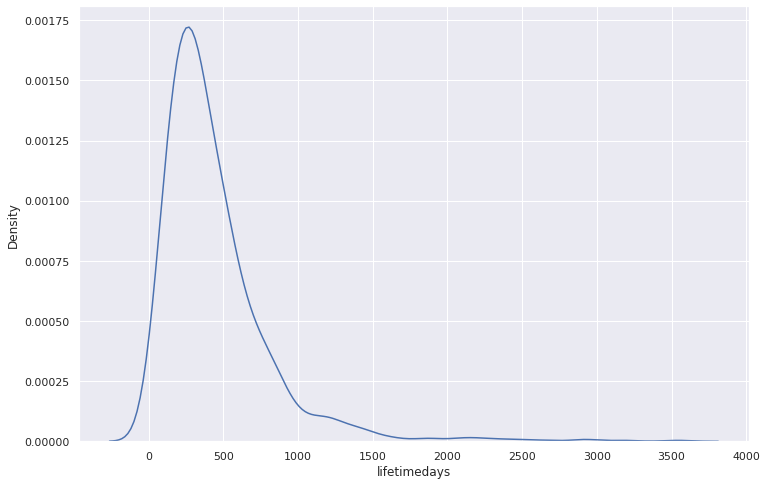

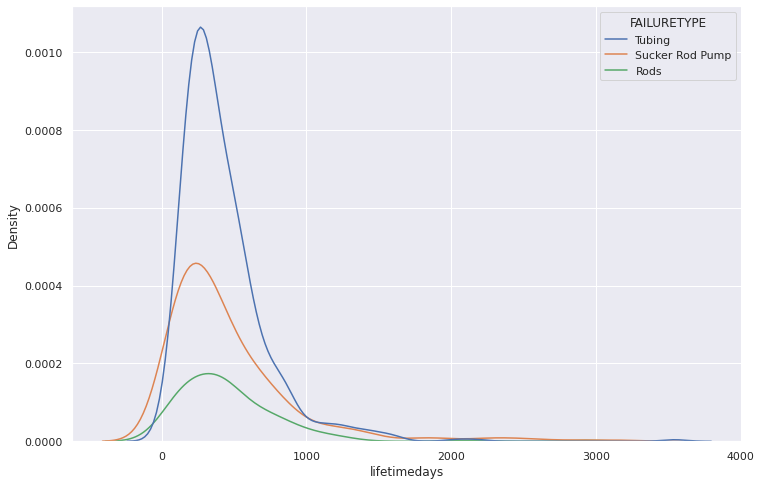

In [12]:
kde(raw_data, 'lifetimedays', 'FAILURETYPE')

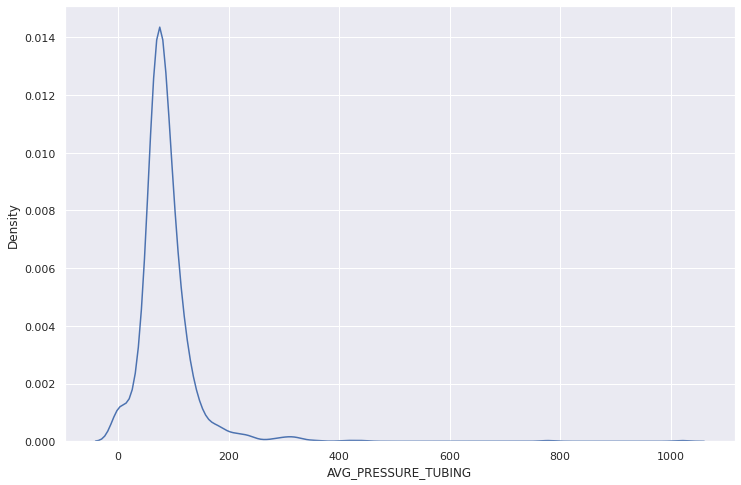

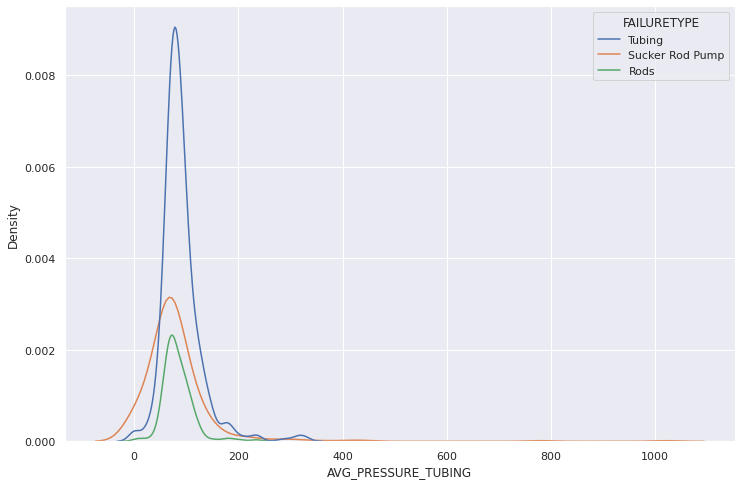

In [13]:
kde(raw_data, 'AVG_PRESSURE_TUBING', 'FAILURETYPE')

### Box Plots

In [14]:
def box(df, columnName, by):
    sns.boxplot(x=columnName, y=by, data=df, showfliers=False)
    plt.savefig('../Images/'+ columnName + '_boxplot.png')

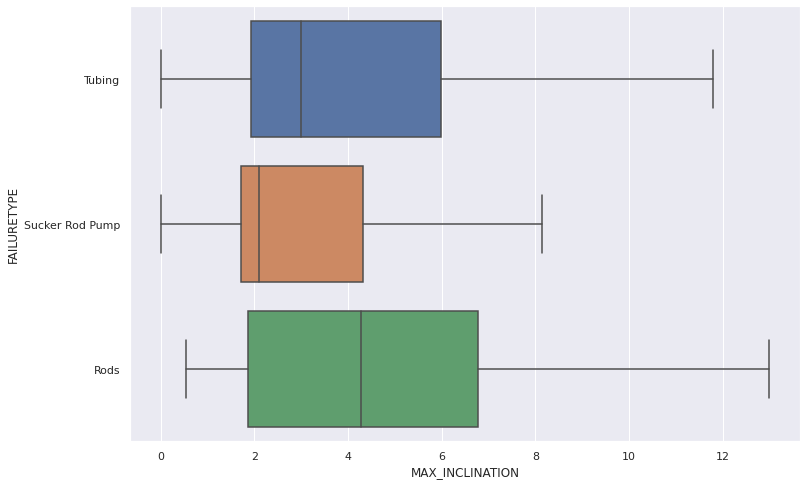

In [15]:
box(raw_data, 'MAX_INCLINATION', 'FAILURETYPE')

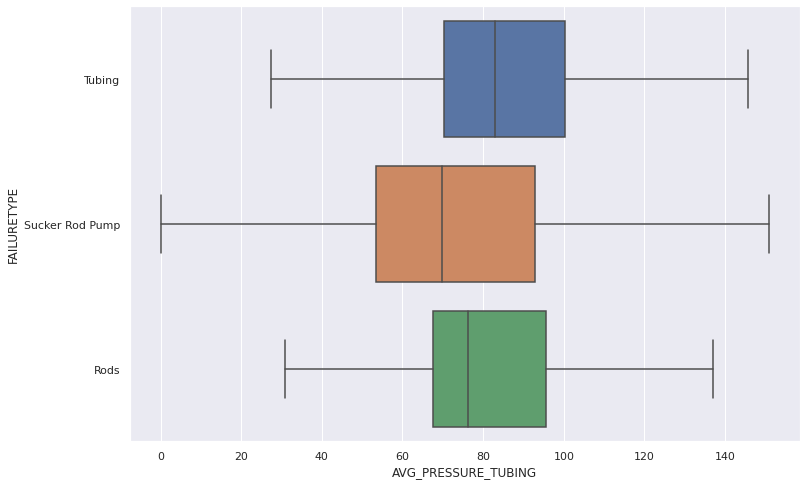

In [16]:
box(raw_data,'AVG_PRESSURE_TUBING', 'FAILURETYPE')

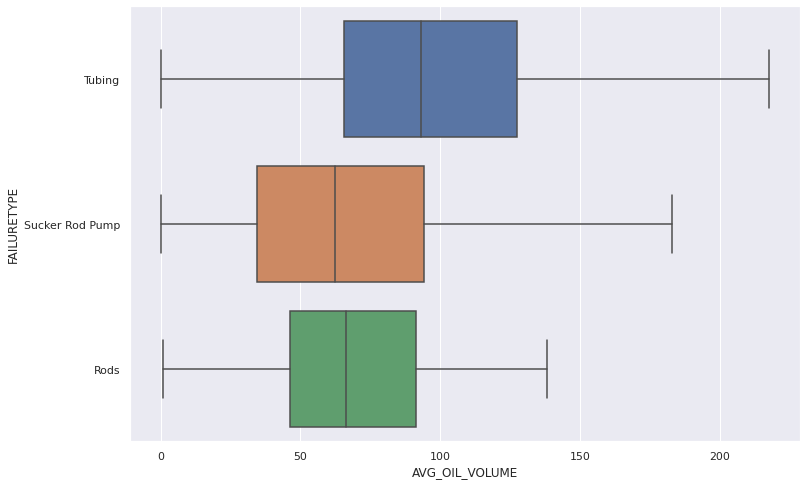

In [17]:
box(raw_data,'AVG_OIL_VOLUME', 'FAILURETYPE')

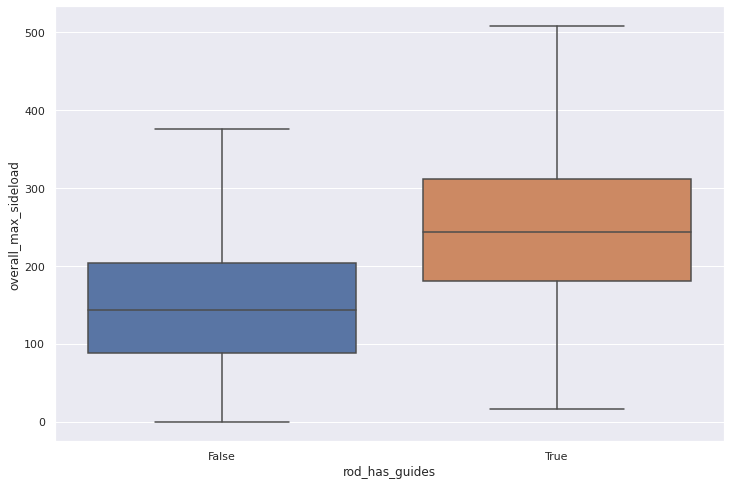

In [18]:
sns.boxplot(x='rod_has_guides', y='overall_max_sideload', data=raw_data, showfliers=False)
plt.savefig('../Images/overall_max_sideload_boxplot.png')

In [19]:
raw_data['rod_has_guides'].value_counts()

False    799
True     374
Name: rod_has_guides, dtype: int64